# Applied ML Project

## Dataset description

The New York Kaggle Airbnb dataset is a comprehensive dataset that contains detailed information on Airbnb listings in New York City, USA. The dataset includes over 48,000 listings and 16 features, including the listing price, location, neighbourhood, number of bedrooms, number of bathrooms, number of reviews, minimum number of nights, and more. This dataset provides a wealth of information that can be used for various purposes, including market analysis, price prediction, and recommendations.





## Exploratory Data Analysis

In [58]:
"""
from google.colab import drive
drive.mount('/content/drive')

# loading in data
airbnb_df = pd.read_csv('/content/drive/My Drive/AB_NYC_2019.csv')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# loading in data\nairbnb_df = pd.read_csv('/content/drive/My Drive/AB_NYC_2019.csv')\n"

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

airbnb_df = pd.read_csv("AB_NYC_2019.csv")
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [60]:
# Checking the shape of the dataset
print(f"Number of rows: {airbnb_df.shape[0]}")
print(f"Number of columns: {airbnb_df.shape[1]}")

# Checking the column names
print("\nColumn names:\n", airbnb_df.columns)

# Checking the data types
print("\nData types:\n", airbnb_df.dtypes)

Number of rows: 48895
Number of columns: 16

Column names:
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Data types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_c

In [61]:
# Checking for missing values
print("\nMissing values:\n", airbnb_df.isnull().sum())


Missing values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [62]:
# Checking the descriptive statistics of numerical columns
print("\nDescriptive statistics:\n", airbnb_df.describe())


Descriptive statistics:
                  id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min       

In [63]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Data Cleaning

In [64]:
# Since last_review, id, host_name and host_id won't help us to predict prices, so we choose to drop them.
# Since reviews_per_month is an important feature, we choose to use mean value to substitute the missing value
airbnb_df.drop(['name','id','host_name','host_name','last_review'], axis=1, inplace=True)
airbnb_df.fillna({'reviews_per_month':0}, inplace=True)

<AxesSubplot:>

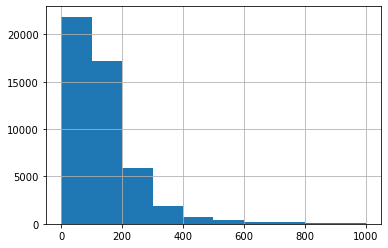

In [65]:
### Lets plot histogram for prices less than $2000
airbnb_df["price"][airbnb_df["price"]<1000].hist()

In [66]:
airbnb_df[airbnb_df["price"]>1000]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,836168,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0
762,605463,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297
946,256239,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,0.00,1,365
1105,2325861,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,0.00,1,0
1480,836168,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...
48080,203565865,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,0.00,1,179
48304,270214015,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0.00,1,222
48305,272166348,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0.00,1,270
48523,217732163,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0.00,1,349


In [68]:
# Since there are only 239 rows that have price > 1000, we treat them as outliers and drop them
airbnb_df=airbnb_df[airbnb_df["price"]<1000]

Text(0.5, 1.0, 'Room Type vs Price')

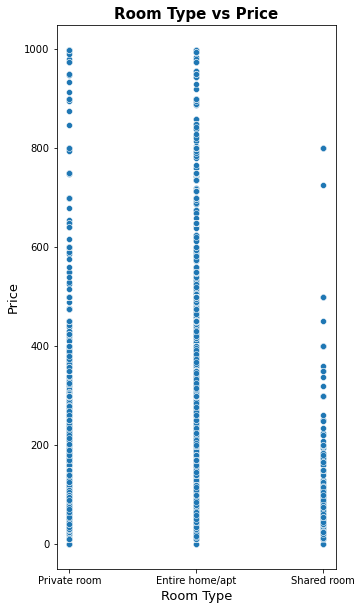

In [69]:
plt.figure(figsize=(5,10))
sns.scatterplot(x='room_type', y='price', data=airbnb_df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

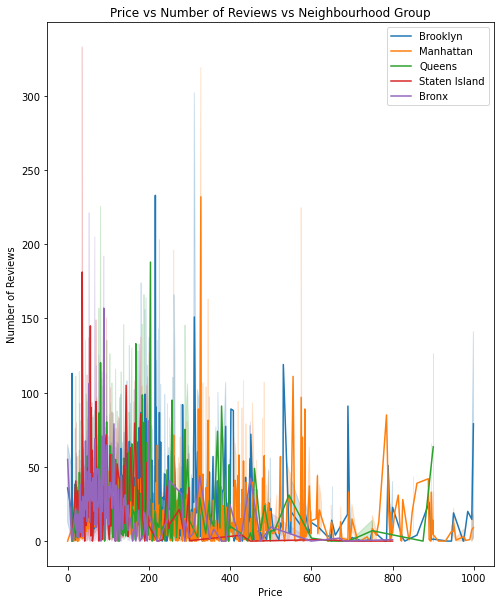

In [70]:
plt.figure(figsize=(8,10))

sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.title("Price vs Number of Reviews vs Neighbourhood Group")

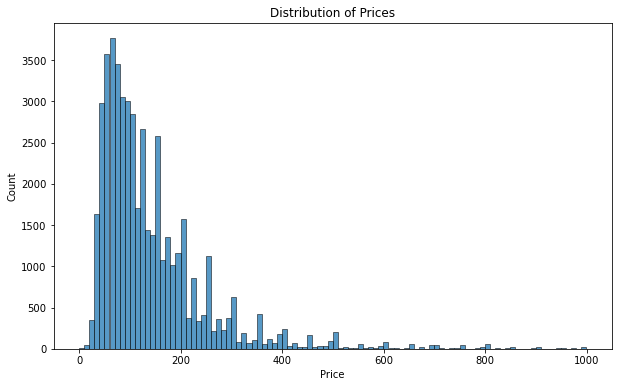

In [71]:
# Plotting the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.price, bins=100)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [72]:
# We remove some price=0 which are being record incorrectly.
airbnb_df = airbnb_df[airbnb_df["price"] > 0]
airbnb_df = airbnb_df.reset_index(drop=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

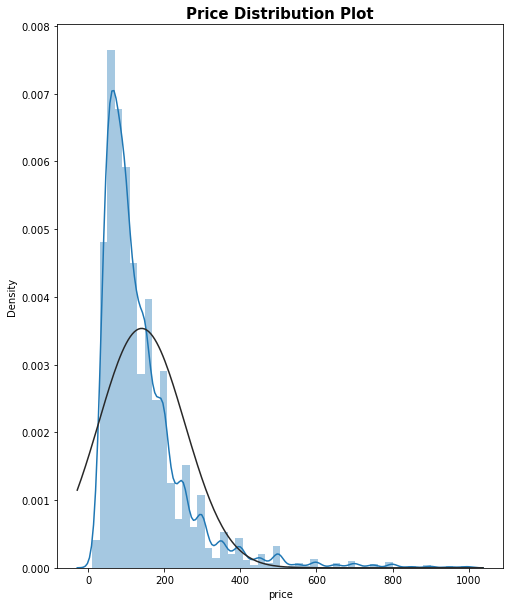

In [73]:
from scipy.stats import norm
plt.figure(figsize=(8,10))
sns.distplot(airbnb_df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [74]:
#Since the feature price is right skewed, we take the log to the price varialbe.
import numpy as np
airbnb_df['price_log'] = np.log(airbnb_df.price)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

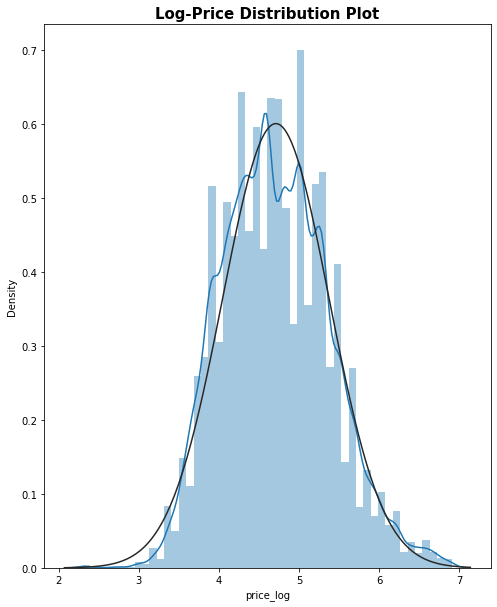

In [75]:
from scipy.stats import norm
plt.figure(figsize=(8,10))
sns.distplot(airbnb_df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

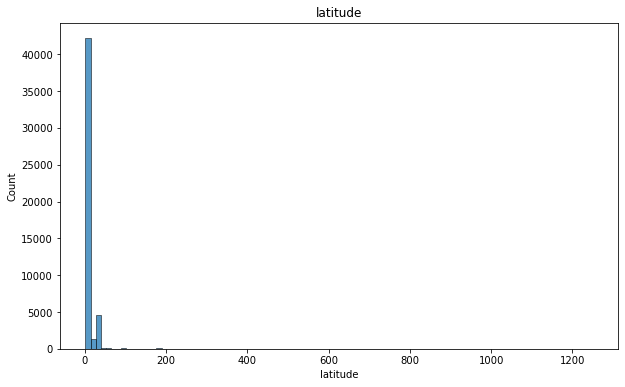

In [77]:
# Plotting the distribution of latitude
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.minimum_nights, bins=100)
plt.title("latitude")
plt.xlabel("latitude")
plt.ylabel("Count")
plt.show()

Based on the above plot, it's clear that the majority of prices are clustered within the 0-500 range, but there are also some large outliers (perhaps luxury homes and apartments) that have much higher prices.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

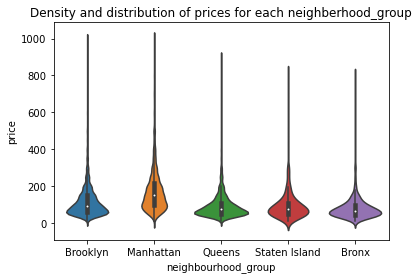

In [78]:
# Examining which boroughs are the most popular

no_outliers = airbnb_df[airbnb_df.price < 1000]
#using violinplot to showcase density and distribtuion of prices 
plot = sns.violinplot(data=no_outliers, x='neighbourhood_group', y='price')
plot.set_title('Density and distribution of prices for each neighberhood_group')

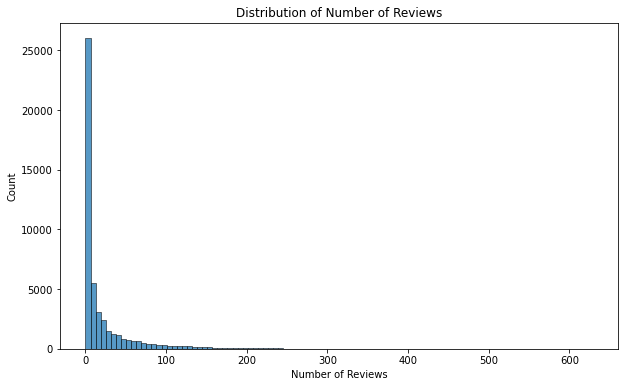

In [79]:
# Plotting the distribution of the number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.number_of_reviews, bins=100)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

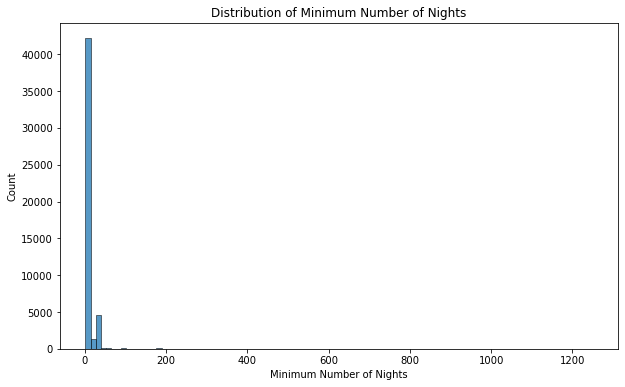

In [80]:
# Plotting the distribution of the minimum number of nights
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.minimum_nights, bins=100)
plt.title("Distribution of Minimum Number of Nights")
plt.xlabel("Minimum Number of Nights")
plt.ylabel("Count")
plt.show()

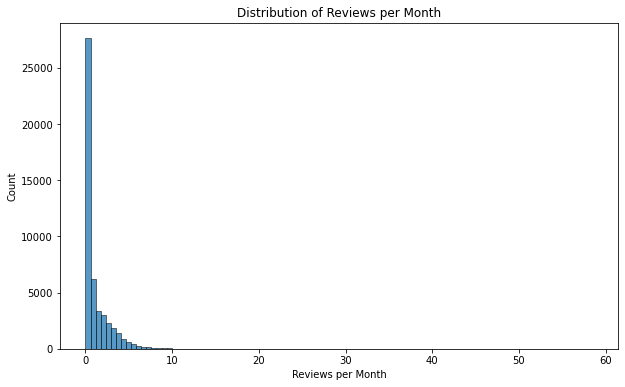

In [81]:
# Plotting the distribution of reviews per month
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.reviews_per_month.dropna(), bins=100)
plt.title("Distribution of Reviews per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Count")
plt.show()


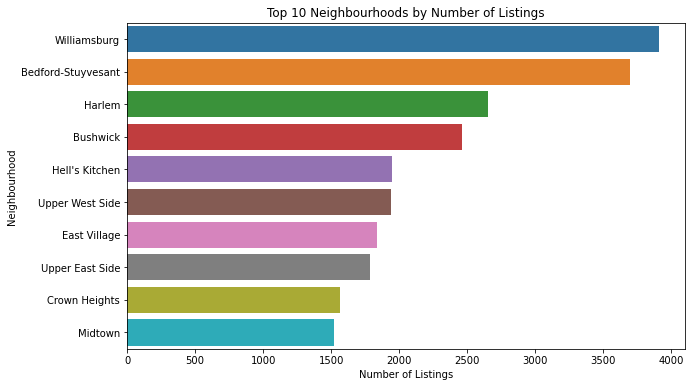

In [82]:
# Plotting the top 10 neighbourhoods by number of listings
plt.figure(figsize=(10, 6))
sns.countplot(y=airbnb_df.neighbourhood, order=airbnb_df.neighbourhood.value_counts().iloc[:10].index)
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.show()


A plot of the top 10 Neighbourhoods by number of listings is shown here. It's interesting that rapidly gentrifying neighborhoods such as Wiliamsburg and Bedford-Stuyvesant are the most popular by total number of Airbnb listings.

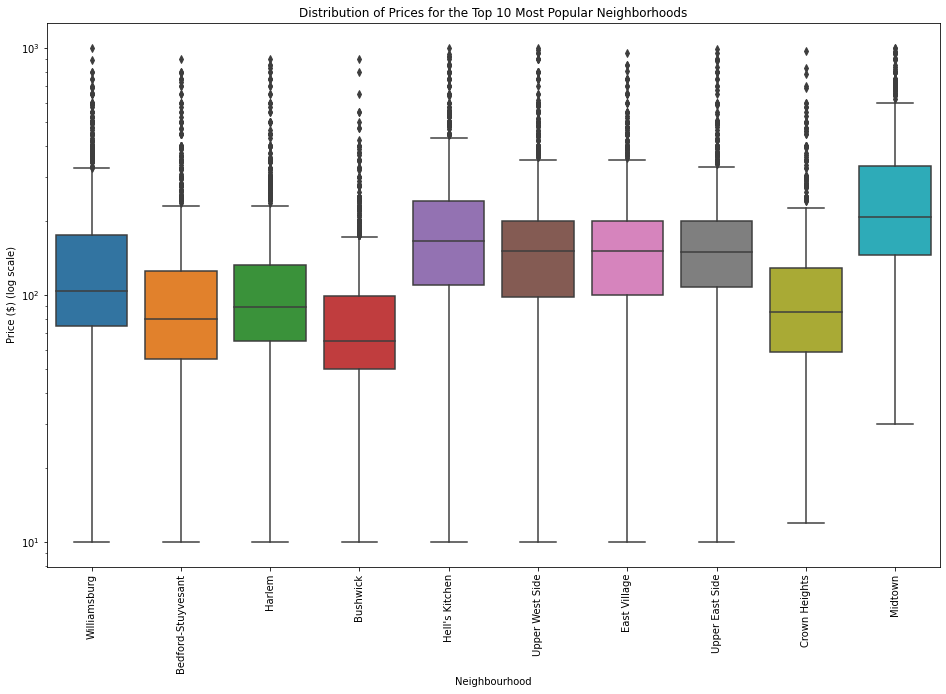

In [83]:
# Plotting the distribution of prices by neighbourhood for the top 10 neighborhoods
plt.figure(figsize=(16, 10))
sns.boxplot(x="neighbourhood", y="price", data=airbnb_df, order=airbnb_df.neighbourhood.value_counts().iloc[:10].index)
plt.title("Distribution of Prices for the Top 10 Most Popular Neighborhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("Price ($) (log scale)")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

Here we have a plot of airbnb prices in the top 10 most popular neighbourhoods where prices are displayed on a log scale. Midtown appears to have the highest median price for airbnb rentals, followed by other Manhattan and Brooklyn neighbourhoods.

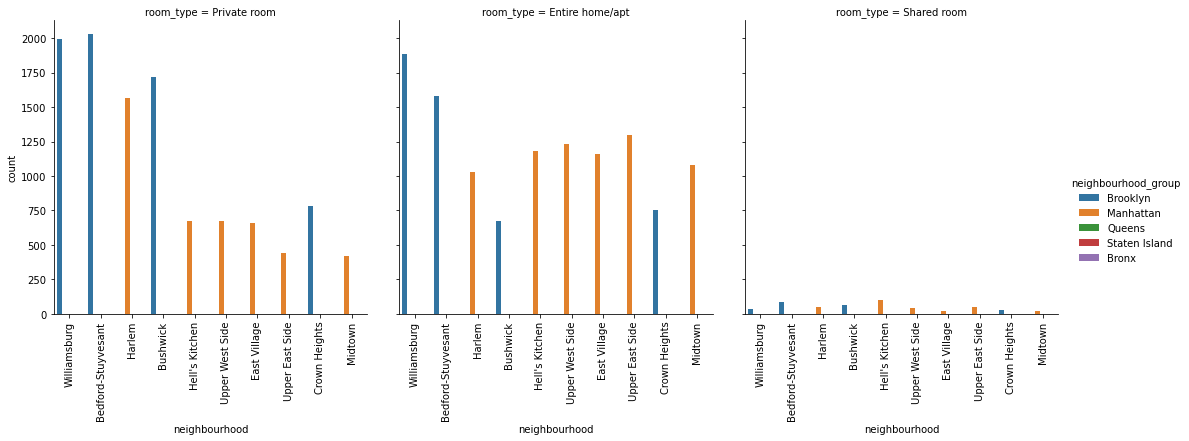

In [84]:
# Inspecting the distribution of room types across popular neighborhoods
room_types=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=airbnb_df, order=airbnb_df.neighbourhood.value_counts().iloc[:10].index, kind='count')
room_types.set_xticklabels(rotation=90)

As we can tell from the plot, Manhattan and Brooklyn are the two most popular boroughs by Airbnb neighborhood popularity. Additionally, it makes sense that Private Rooms and Entire home/apartments are far more popular than Shared rooms for Airbnb rentals. 

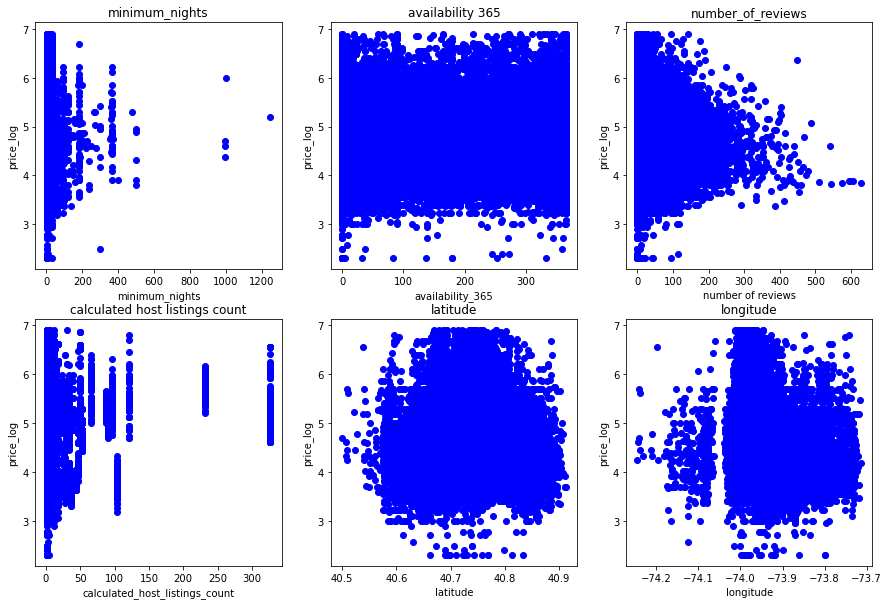

In [85]:


plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.scatter(airbnb_df['minimum_nights'], airbnb_df['price_log'], c ="blue")
plt.xlabel("minimum_nights")
plt.title('minimum_nights')
plt.ylabel('price_log')

plt.subplot(2, 3, 2)
plt.scatter(airbnb_df['availability_365'], airbnb_df['price_log'], c ="blue")
plt.title('availability 365')
plt.xlabel("availability_365")
plt.ylabel('price_log')

plt.subplot(2, 3, 3) 
plt.scatter(airbnb_df['number_of_reviews'], airbnb_df['price_log'], c ="blue")
plt.title('number_of_reviews')
plt.xlabel("number of reviews")
plt.ylabel('price_log')

plt.subplot(2, 3, 4)
plt.scatter(airbnb_df['calculated_host_listings_count'], airbnb_df['price_log'], c ="blue")
plt.xlabel("calculated_host_listings_count")
plt.title('calculated host listings count')
plt.ylabel('price_log')

plt.subplot(2, 3, 5)
plt.scatter(airbnb_df['latitude'], airbnb_df['price_log'], c ="blue")
plt.xlabel("latitude")
plt.title('latitude')
plt.ylabel('price_log')

plt.subplot(2, 3, 6)
plt.scatter(airbnb_df['longitude'], airbnb_df['price_log'], c ="blue")
plt.xlabel("longitude")
plt.title('longitude')
plt.ylabel('price_log')


plt.show()

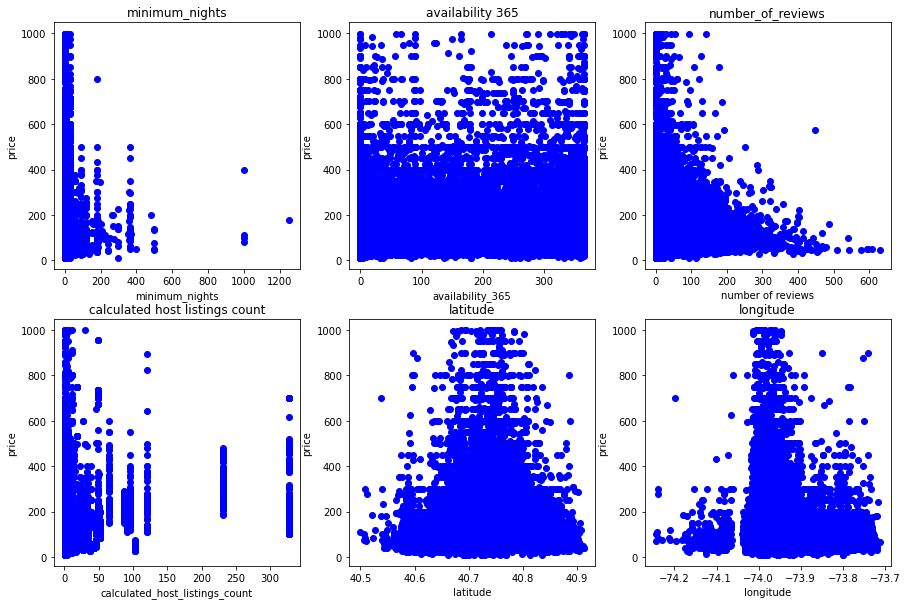

In [86]:


plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.scatter(airbnb_df['minimum_nights'], airbnb_df['price'], c ="blue")
plt.xlabel("minimum_nights")
plt.title('minimum_nights')
plt.ylabel('price')

plt.subplot(2, 3, 2)
plt.scatter(airbnb_df['availability_365'], airbnb_df['price'], c ="blue")
plt.title('availability 365')
plt.xlabel("availability_365")
plt.ylabel('price')

plt.subplot(2, 3, 3) 
plt.scatter(airbnb_df['number_of_reviews'], airbnb_df['price'], c ="blue")
plt.title('number_of_reviews')
plt.xlabel("number of reviews")
plt.ylabel('price')

plt.subplot(2, 3, 4)
plt.scatter(airbnb_df['calculated_host_listings_count'], airbnb_df['price'], c ="blue")
plt.xlabel("calculated_host_listings_count")
plt.title('calculated host listings count')
plt.ylabel('price')

plt.subplot(2, 3, 5)
plt.scatter(airbnb_df['latitude'], airbnb_df['price'], c ="blue")
plt.xlabel("latitude")
plt.title('latitude')
plt.ylabel('price')

plt.subplot(2, 3, 6)
plt.scatter(airbnb_df['longitude'], airbnb_df['price'], c ="blue")
plt.xlabel("longitude")
plt.title('longitude')
plt.ylabel('price')


plt.show()

Based on a correlation plot of the features chosen for examining our airbnb data, the only highly correlated features are reviews_per_month and number_of_reviews. It makes a lot of sense for these two features to be highly correlated because a high number of reviews per month would likely suggest a high number of total reviews.

### Model 1 - Linear Regression

In [87]:
from sklearn.model_selection import train_test_split
X = airbnb_df.drop(columns=['price','price_log'])
y = airbnb_df['price_log']


In [88]:
#Encode
X = pd.get_dummies(X, columns=['neighbourhood_group','room_type'])
X

,host_id,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,Kensington,40.64749,-73.97237,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2845,Midtown,40.75362,-73.98377,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,4632,Harlem,40.80902,-73.94190,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3,4869,Clinton Hill,40.68514,-73.95976,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,7192,East Harlem,40.79851,-73.94399,10,9,0.10,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48581,8232441,Bedford-Stuyvesant,40.67853,-73.94995,2,0,0.00,2,9,0,1,0,0,0,0,1,0
48582,6570630,Bushwick,40.70184,-73.93317,4,0,0.00,2,36,0,1,0,0,0,0,1,0
48583,23492952,Harlem,40.81475,-73.94867,10,0,0.00,1,27,0,0,1,0,0,1,0,0
48584,30985759,Hell's Kitchen,40.75751,-73.99112,1,0,0.00,6,2,0,0,1,0,0,0,0,1


In [89]:
X['neighbourhood'].value_counts()

Williamsburg          3907
Bedford-Stuyvesant    3697
Harlem                2650
Bushwick              2460
Hell's Kitchen        1948
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [90]:
# Since there are 221 different neighbourhoods, one-hot encoding would mess up the data, we try drop this feature
X = X.drop(columns=['neighbourhood'])

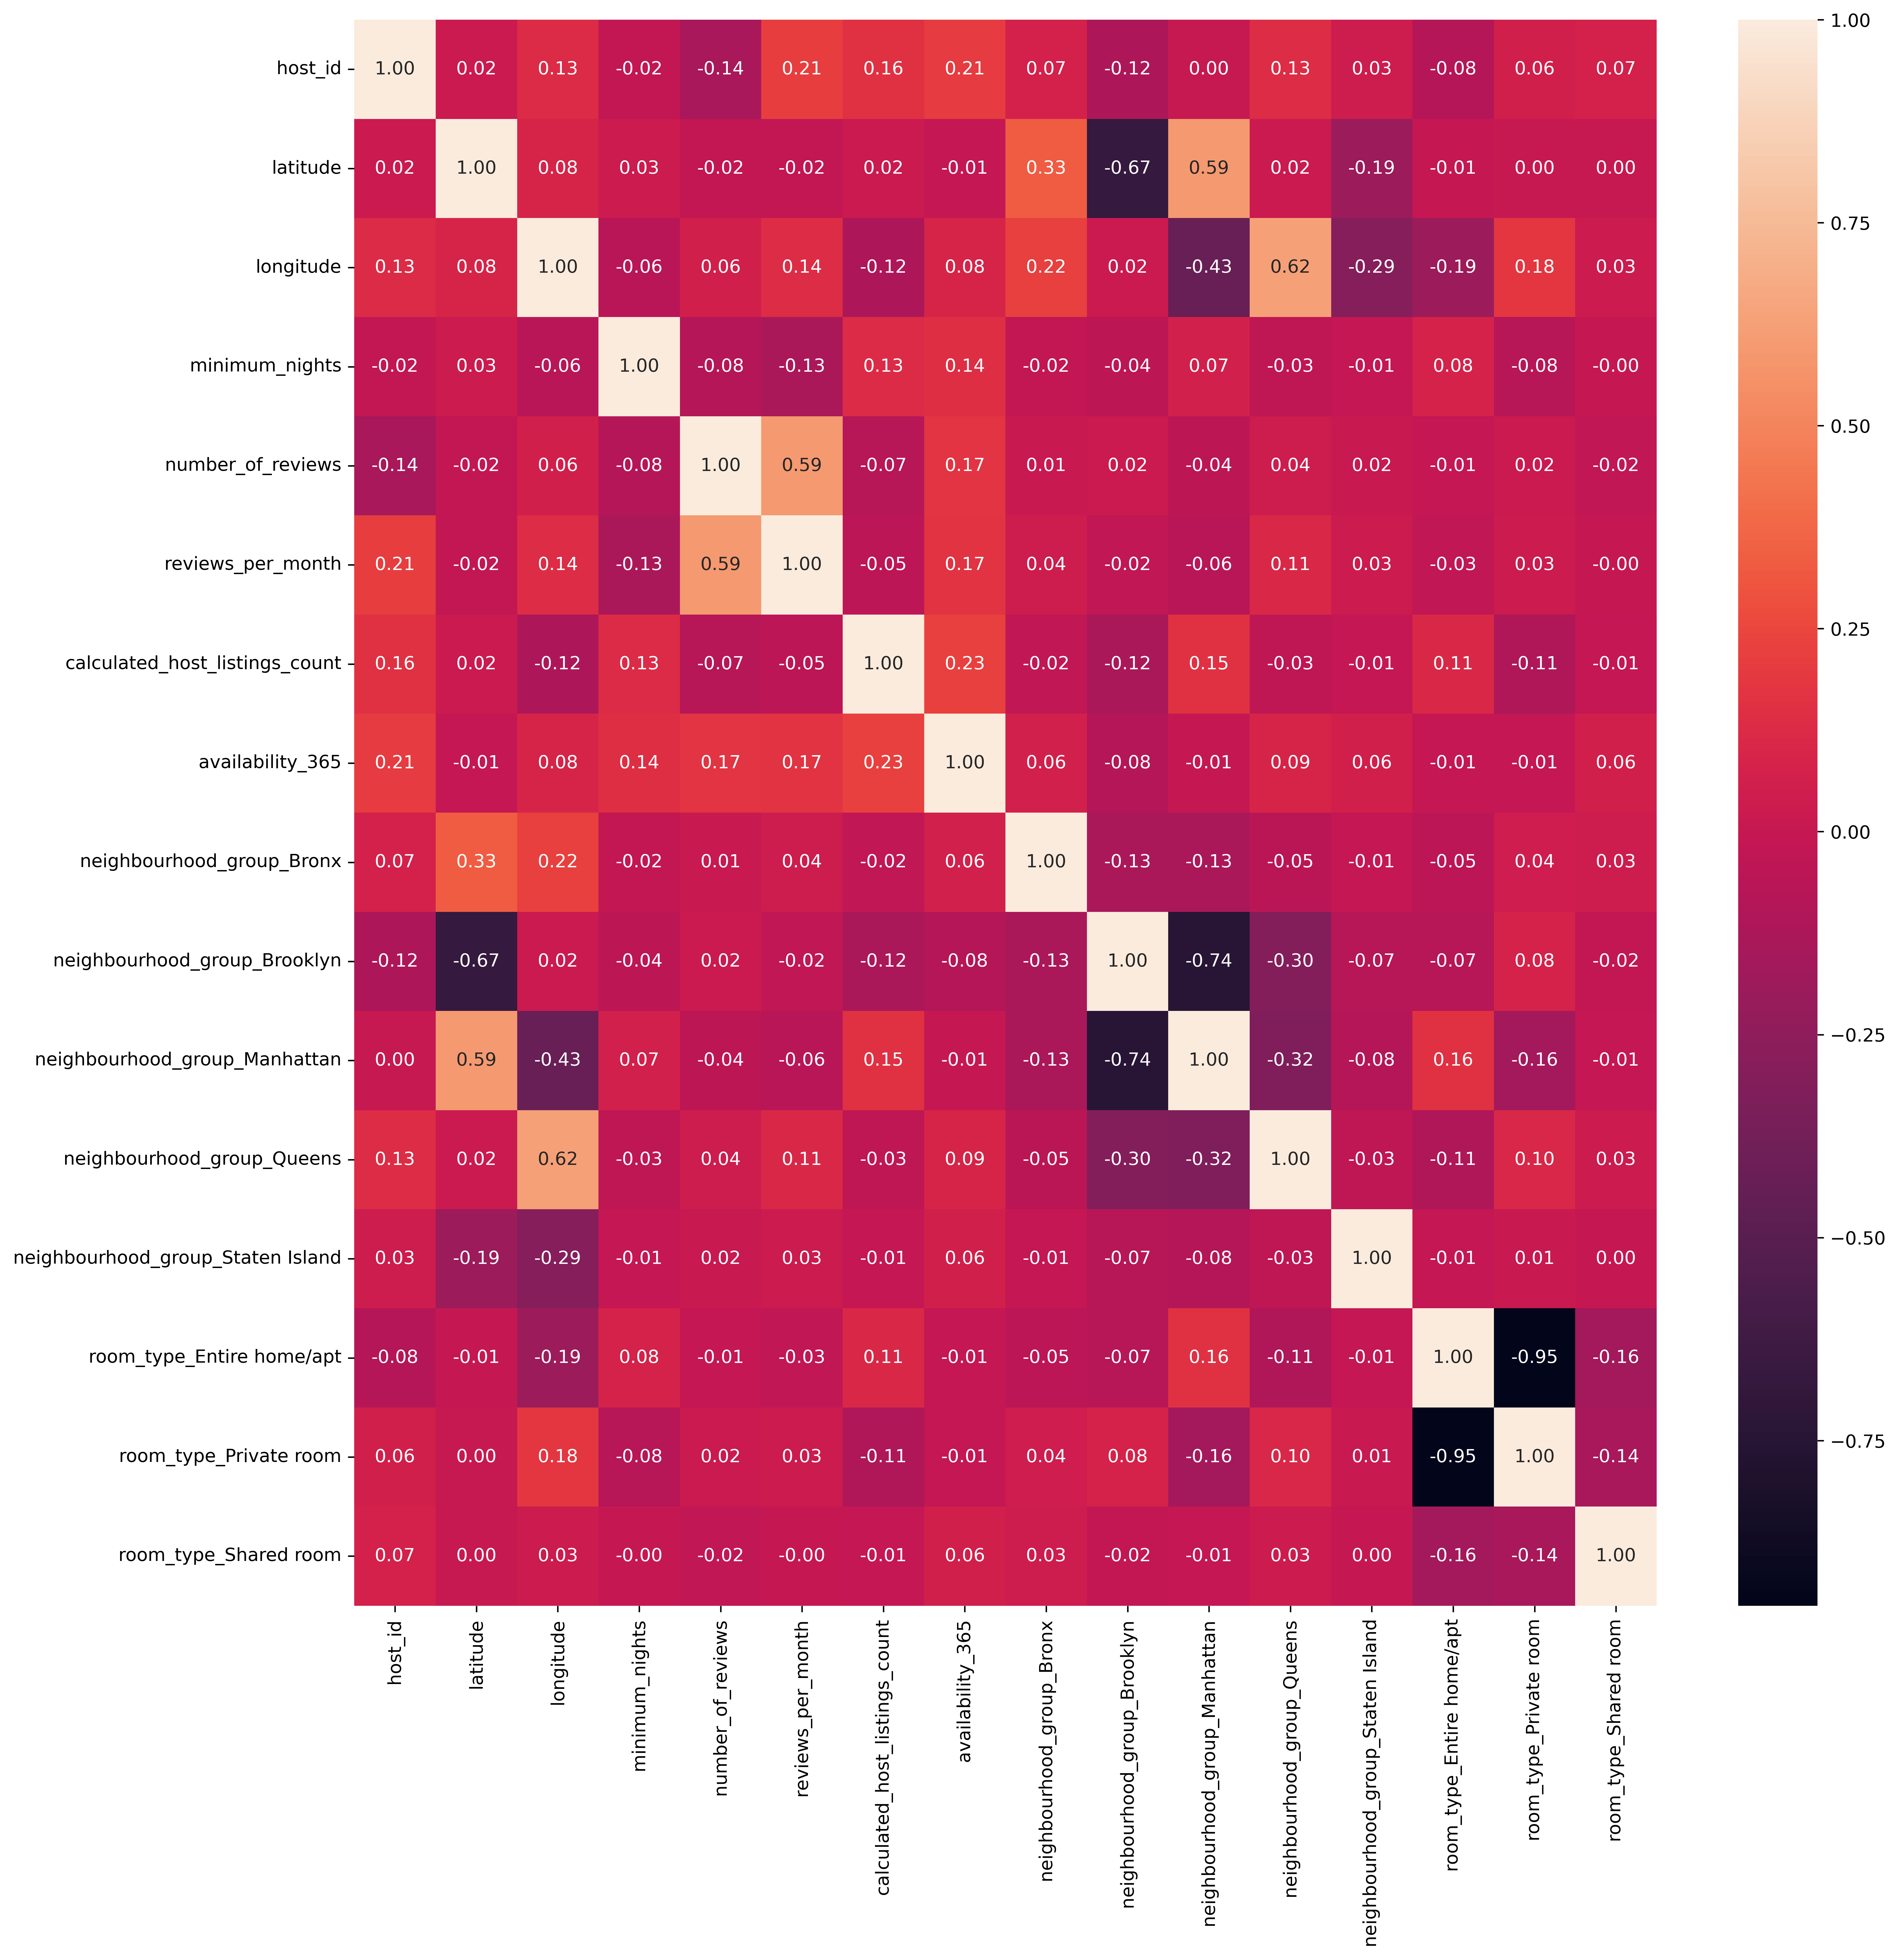

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = X.corr()
fig = plt.figure(figsize=(16,16), dpi = 480)
sns.heatmap(X.corr(), annot = True, fmt = '.2f')

plt.show()

In [92]:
#The correlation between 'room_type_Entire home/apt' and 'room_type_Private room' are 0.95,
# which is too large. We need to drop one from this pair.
X = X.drop(columns=['room_type_Private room'])

In [93]:
# Split data into training, validation, and test set.
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

In [94]:
# Normalize the data set, then each feature has 0 mean and 1 standard deviation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   
X_val = scaler.transform(X_val)           
X_test = scaler.transform(X_test)        

In [95]:
# Linear regression with log
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_train = LR.fit(X_train,y_train)
LR_val_score = LR_train.score(X_val,y_val)
LR_test_score = LR_train.score(X_test,y_test)
print('Linear regression for validation set:', LR_val_score)
print('Linear regression for test set:', LR_test_score)

Linear regression for validation set: 0.5123344652048558
Linear regression for test set: 0.5140903265725973


In [96]:
#Ridge Model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.01, normalize = True)
ridge_train = ridge.fit(X_train, y_train)             
ridge_val_score = ridge_train.score(X_val,y_val) 
ridge_test_score = ridge_train.score(X_test,y_test) 
print('Ridge regression for validation set:', ridge_val_score)
print('Ridge regression for test set:', ridge_test_score)

Ridge regression for validation set: 0.5122558561084735
Ridge regression for test set: 0.5141883270000239


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [97]:
#Lasso Model
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha = 0.001, normalize =False)
Lasso_train = Lasso.fit(X_train, y_train)
Lasso_val_score = Lasso_train.score(X_val,y_val)
Lasso_test_score = Lasso_train.score(X_test,y_test)
print('Linear regression for validation set:', Lasso_val_score)
print('Linear regression for test set:', Lasso_test_score)


Linear regression for validation set: 0.5123804754263661
Linear regression for test set: 0.5142392091390413


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [98]:
#ElasticNet Model
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 0.01, normalize=False)
enet_train = enet.fit(X_train, y_train) 
enet_val_score = enet_train.score(X_val,y_val)
enet_test_score = enet_train.score(X_test,y_test)
print('Linear regression for validation set:', enet_val_score)
print('Linear regression for test set:', enet_test_score)

Linear regression for validation set: 0.5116465591636687
Linear regression for test set: 0.5139911455606095


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
